In [3]:
import pandas as pd

df = pd.read_excel('C:\\Users\\vedik\\Downloads\\Final GBA.xlsx')
print(df.head())

   Feedback_ID Customer_Name  Age  Gender     City Product_Category  \
0            1  Ishaan Joshi   29  Female  Kolkata          Grocery   
1            2  Vivaan Singh   60    Male    Delhi   Home & Kitchen   
2            3    Kavya Bhat   63  Female   Mumbai      Electronics   
3            4   Karan Gupta   33  Female  Chennai         Footwear   
4            5   Vedika Iyer   47    Male  Kolkata          Apparel   

   Unnamed: 6  Rating(1-5) Verified_Purchase  Response_Time_Days Sentiment  \
0         NaN            4               Yes                   3  Positive   
1         NaN            4               Yes                  13  Positive   
2         NaN            4               Yes                   8  Positive   
3         NaN            1                No                   7  Negative   
4         NaN            4               Yes                   3  Positive   

                                                text  
0  Product matches the description perfectly. Fas

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (run this once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# 1. Remove missing rows
# We drop rows where the 'text' column is NaN (empty)
df.dropna(subset=['text'], inplace=True)

# 2. Lowercase
# It is best practice to lowercase BEFORE other steps to ensure consistency
df['text_lowercase'] = df['text'].astype(str).str.lower()

# 3. Remove special characters
# We use Regex to replace anything that is NOT a letter, number, or space with an empty string
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['text_no_special'] = df['text_lowercase'].apply(remove_special_chars)

# 4. Tokenize
# This converts the string sentences into a list of words
df['text_tokenized'] = df['text_no_special'].apply(word_tokenize)

# 5. Remove stop words
# We filter the tokenized list to remove common words like 'is', 'the', 'and'
stop_words = set(stopwords.words('english'))

def remove_stopwords(token_list):
    return [word for word in token_list if word not in stop_words]

df['text_no_stopwords'] = df['text_tokenized'].apply(remove_stopwords)

# Display the first few rows to check the new columns
print(df.head())

# Optional: Save the result back to Excel
# df.to_excel("processed_file.xlsx", index=False)

   Feedback_ID Customer_Name  Age  Gender     City Product_Category  \
0            1  Ishaan Joshi   29  Female  Kolkata          Grocery   
1            2  Vivaan Singh   60    Male    Delhi   Home & Kitchen   
2            3    Kavya Bhat   63  Female   Mumbai      Electronics   
3            4   Karan Gupta   33  Female  Chennai         Footwear   
4            5   Vedika Iyer   47    Male  Kolkata          Apparel   

   Unnamed: 6  Rating(1-5) Verified_Purchase  Response_Time_Days Sentiment  \
0         NaN            4               Yes                   3  Positive   
1         NaN            4               Yes                  13  Positive   
2         NaN            4               Yes                   8  Positive   
3         NaN            1                No                   7  Negative   
4         NaN            4               Yes                   3  Positive   

                                                text  \
0  Product matches the description perfectly. Fa

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vedik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Define the name for your output Excel file
output_file_path = 'preprocessed_data.xlsx'

# Export the DataFrame to the new Excel file
# index=False prevents writing the DataFrame's row numbers into the spreadsheet
df.to_excel(output_file_path, index=False)

print(f"Processing complete. The updated data has been saved to '{output_file_path}'")

Processing complete. The updated data has been saved to 'preprocessed_data.xlsx'


In [11]:
import pandas as pd
from textblob import TextBlob
import ast  # Library to safely convert stringified lists back to actual lists

# 1. Load the preprocessed Excel file
input_filename = 'preprocessed_data.xlsx'
df = pd.read_excel(input_filename)

# 2. Prepare the text for Sentiment Analysis
# The 'text_no_stopwords' column is likely read as a string like "['word1', 'word2']"
# We need to convert it back to a real list, and then join words into a sentence.

def prepare_text_for_blob(text_entry):
    # If the entry is already a string (and not a string representation of a list), just return it
    if not isinstance(text_entry, str) or not text_entry.startswith('['):
        return str(text_entry)
    
    try:
        # Convert string "['word', 'word']" -> list ['word', 'word']
        word_list = ast.literal_eval(text_entry)
        # Join list ['word', 'word'] -> string "word word"
        return " ".join(word_list)
    except:
        return str(text_entry)

# Apply this cleaning function
# We create a temporary column for the analysis to ensure clean input
df['temp_clean_text'] = df['text_no_stopwords'].apply(prepare_text_for_blob)

# 3. Perform Sentiment Analysis
# Function to get polarity
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Function to categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions
df['sentiment_score'] = df['temp_clean_text'].apply(get_sentiment_score)
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# 4. Clean up
# Remove the temporary helper column we created
df.drop(columns=['temp_clean_text'], inplace=True)

# 5. Save the final result
output_filename = "sentiment_analysis_output.xlsx"
df.to_excel(output_filename, index=False)

print("Sentiment Analysis Complete!")
print(df[['text', 'sentiment_score', 'sentiment_category']].head())
print(f"File saved as: {output_filename}")

Sentiment Analysis Complete!
                                                text  sentiment_score  \
0  Product matches the description perfectly. Fas...             0.20   
1  Amazing service and packaging. Highly recommen...             0.38   
2  Product matches the description perfectly. Fas...             0.20   
3          Not worth the price. Would not recommend.             0.30   
4  Great value for money. The material/finish is ...             0.60   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
File saved as: sentiment_analysis_output.xlsx


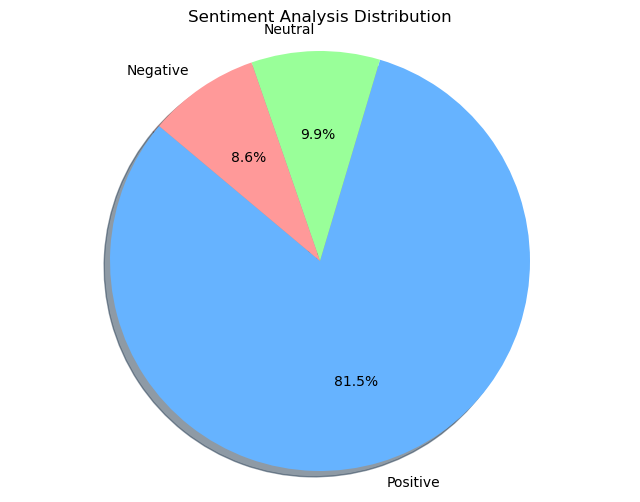

Chart saved as sentiment_pie_chart.png


<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the sentiment analysis results
input_filename = "sentiment_analysis_output.xlsx"
df = pd.read_excel(input_filename)

# 2. Count the number of Positive, Negative, and Neutral rows
sentiment_counts = df['sentiment_category'].value_counts()

# 3. Define colors for the chart (Green for Positive, Red for Negative, Blue for Neutral)
# We map the specific categories to specific colors to make it intuitive
color_map = {
    'Positive': '#66b3ff', # Light Blue
    'Negative': '#ff9999', # Light Red
    'Neutral':  '#99ff99'  # Light Green
}
# Create a list of colors in the same order as our data
colors = [color_map.get(x, '#999999') for x in sentiment_counts.index]

# 4. Plot the Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', # Show percentage with 1 decimal place
    startangle=140, 
    colors=colors,
    shadow=True
)

plt.title('Sentiment Analysis Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# 5. Show the plot
plt.show()

# Optional: Save the chart as an image
plt.savefig('sentiment_pie_chart.png')
print("Chart saved as sentiment_pie_chart.png")

In [13]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Load the file from the previous step
input_filename = "sentiment_analysis_output.xlsx"
df = pd.read_excel(input_filename)

# 2. Prepare the text
# Excel saves lists as strings like "['word1', 'word2']". 
# We need to join them into a clean string: "word1 word2"
def prepare_text_for_nmf(text_entry):
    if pd.isna(text_entry):
        return ""
    # If it's a string looking like a list, parse it
    if isinstance(text_entry, str) and text_entry.startswith('['):
        try:
            word_list = ast.literal_eval(text_entry)
            return " ".join(word_list)
        except:
            return text_entry
    # If it's already a list (rare if loaded from Excel), join it
    elif isinstance(text_entry, list):
        return " ".join(text_entry)
    return str(text_entry)

df['nmf_input'] = df['text_no_stopwords'].apply(prepare_text_for_nmf)

# 3. Create the TF-IDF Matrix (Convert text to numbers)
# min_df=2 means ignore words that appear in less than 2 documents (noise removal)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['nmf_input'])

# 4. Run NMF
# n_components is the Number of Topics. You can change this number (e.g., 5, 10, 20)
num_topics = 5 
nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvd')
nmf_features = nmf_model.fit_transform(tfidf)

# 5. Extract the Top Words for each Topic
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_dict = {}

print("--- Discovered Topics ---")
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top 10 words for this topic
    top_features_ind = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_features_ind]
    topic_string = ", ".join(top_words)
    
    topic_dict[topic_idx] = topic_string
    print(f"Topic {topic_idx}: {topic_string}")

# 6. Assign Topics to the Excel Rows
# Get the column index with the highest value for each row
df['Topic_ID'] = nmf_features.argmax(axis=1)

# Map the ID to the string of words
df['Topic_Keywords'] = df['Topic_ID'].map(topic_dict)

# 7. Clean up and Save
# Remove the temporary input column
df.drop(columns=['nmf_input'], inplace=True)

output_filename = "topic_modeling_output.xlsx"
df.to_excel(output_filename, index=False)

print(f"\nProcessing complete! File saved as '{output_filename}'")

--- Discovered Topics ---
Topic 0: matches, perfectly, shipping, fast, description, product, customer, support, neat, query
Topic 1: value, money, materialfinish, great, excellent, different, color, slightly, pictures, size
Topic 2: amazing, highly, service, packaging, recommend, neat, pictures, color, slightly, different
Topic 3: buy, loved, quick, delivery, quality, color, different, pictures, slightly, neat
Topic 4: exceeded, expectations, satisfied, product, size, helped, chart, lot, sale, bought

Processing complete! File saved as 'topic_modeling_output.xlsx'


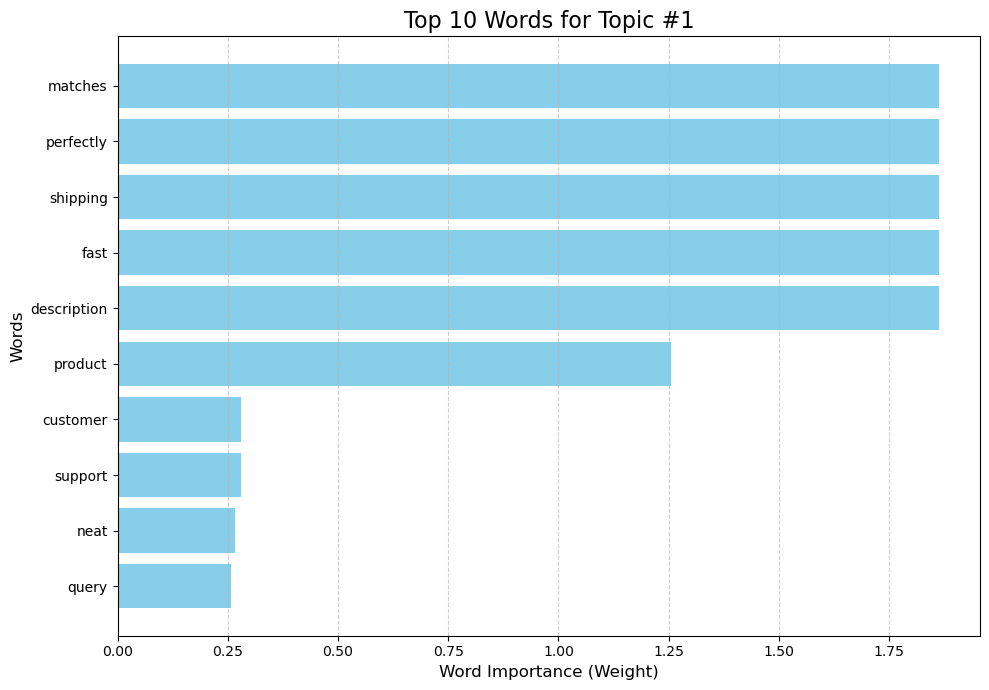

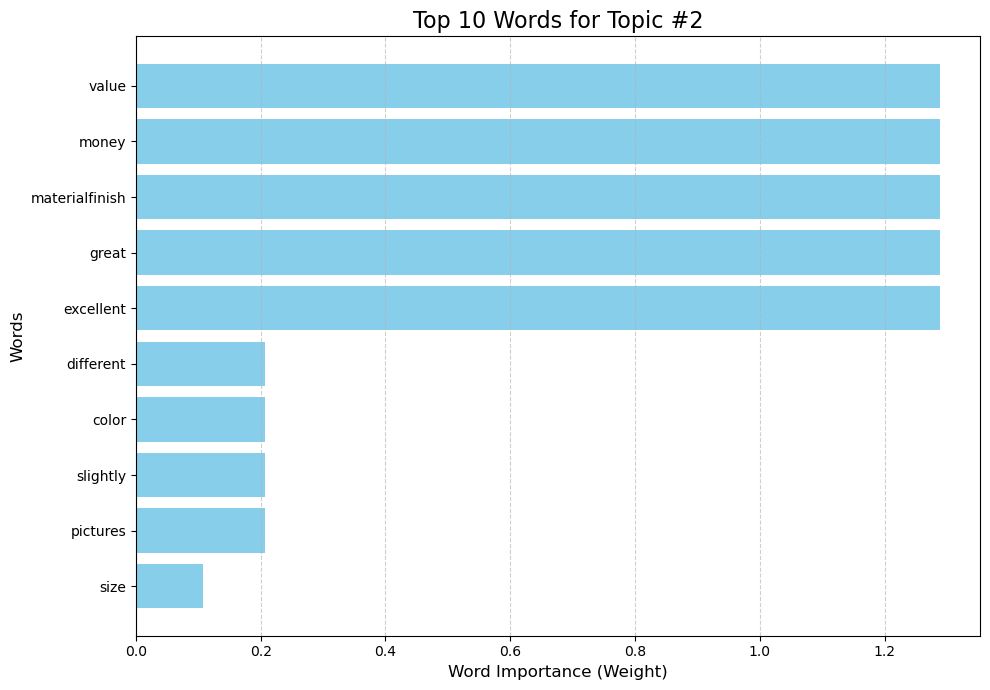

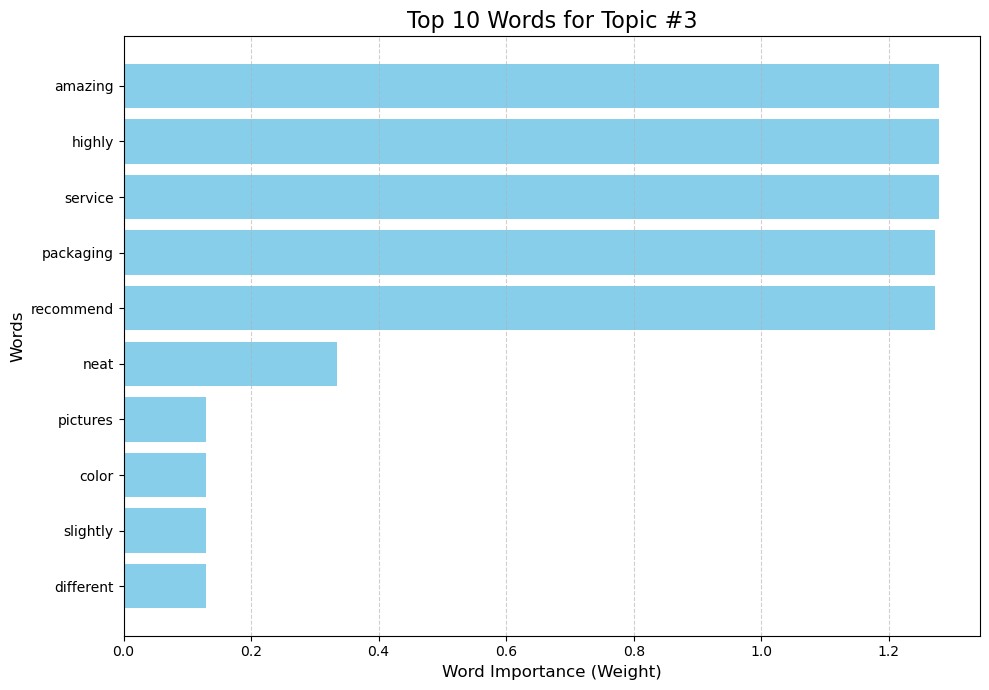

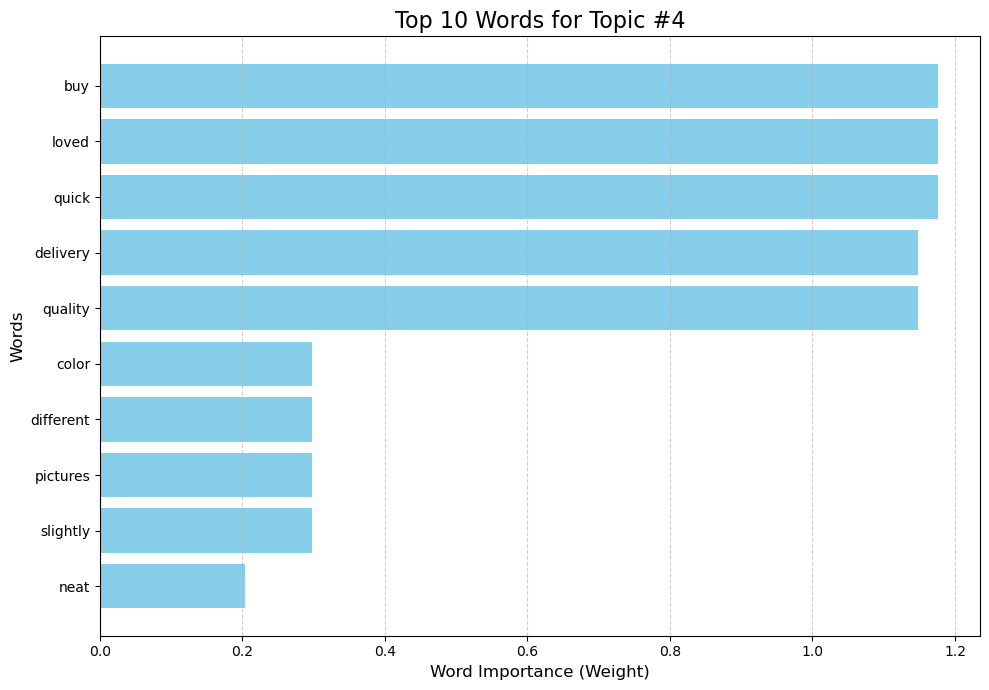

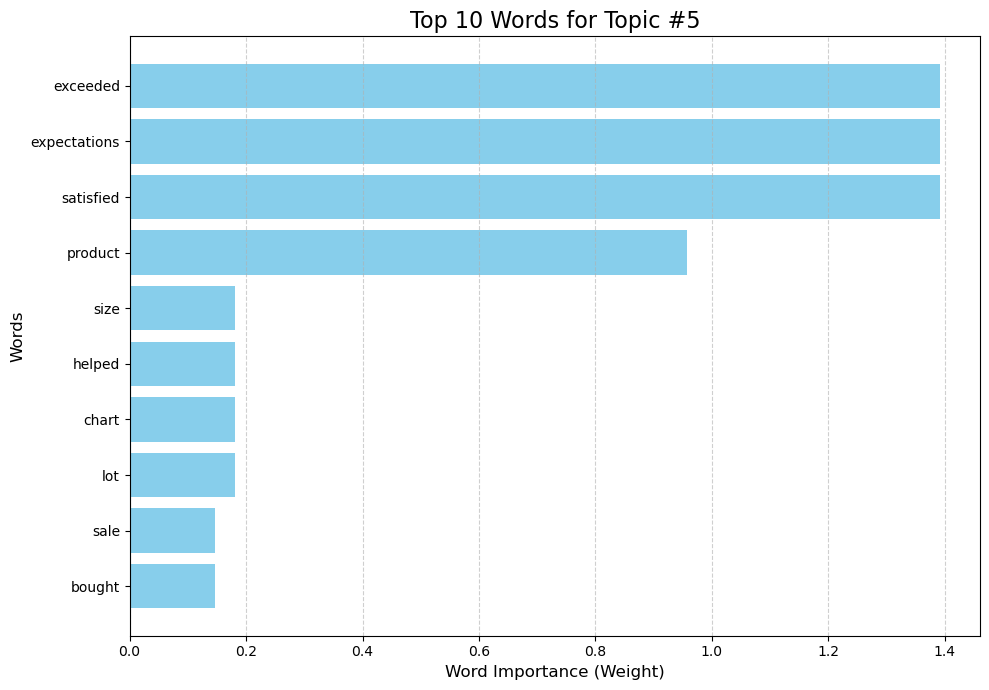

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prerequisite Check ---
# The following code assumes 'nmf_model' and 'feature_names' from the previous
# topic modeling step are still in your notebook's memory.
# If you get a NameError, please re-run the NMF code cell first.
# --------------------------------------------------------------------

# Define the number of top words you want to display in each chart
num_top_words = 10

# Loop through each topic in the NMF model
for topic_idx, topic in enumerate(nmf_model.components_):
    
    # --- 1. Get the top words and their weights for the current topic ---
    
    # Get the indices of the top words by sorting the topic's weights
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    
    # Get the actual words from the feature_names list
    top_words = [feature_names[i] for i in top_words_indices]
    
    # Get the weights of those top words
    top_word_weights = topic[top_words_indices]
    
    # --- 2. Create the bar chart ---
    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Plot horizontal bars
    ax.barh(top_words, top_word_weights, color='skyblue')
    
    # Invert the y-axis to have the most important word on top
    ax.invert_yaxis()
    
    # --- 3. Customize the plot for clarity ---
    
    # Set the title for the chart
    ax.set_title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    
    # Label the axes
    ax.set_xlabel('Word Importance (Weight)', fontsize=12)
    ax.set_ylabel('Words', fontsize=12)
    
    # Add a grid for easier reading of values
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Ensure layout is tight
    plt.tight_layout()
    
    # --- 4. Display the plot ---
    plt.show()